C:\Users\John\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1071.5138164492196, tolerance: 3.0566464880308284
  model = cd_fast.enet_coordinate_descent(
C:\Users\John\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 995.5521869557688, tolerance: 3.0566464880308284
  model = cd_fast.enet_coordinate_descent(
C:\Users\John\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 893.9426091021762, tolerance: 3.0566464880308284
  model = cd_fast.enet_coordinate_descent(
C:\Users\John\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

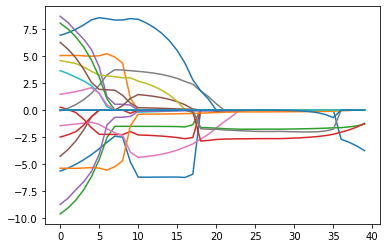

In [8]:
import csv
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
import numpy as np

A=np.zeros((0,7),dtype='float64')

with open('train.csv','r') as csvfile:
    reader=csv.reader(csvfile)
    next(reader)
    for row in reader:
        A=np.append(A,np.asarray(row,dtype='float64')[np.newaxis,:],axis=0)

y=A[:,1]
A=A[:,2:7]  #raw data, 5 dimensions

B=A
B=np.append(np.ones((700,1)),B,axis=1)
B=np.append(B,np.square(A),axis=1)
B=np.append(B,np.exp(A),axis=1)
B=np.append(B,np.cos(A),axis=1)    #data mapped to feature space, 25 dimensions

n=40
Alphas=np.exp(np.linspace(-12,-2,n))
X=np.zeros((21,0),dtype='float64')     #coefficient matrix
V=np.zeros(n)   #error matrix on test set

for i in range(n):
    model=Lasso(alpha=Alphas[i], fit_intercept=False,max_iter=100000)
    model.fit(B,y)
    
    #print(model.coef_)
    X=np.append(X,model.coef_[:,np.newaxis],axis=1)
    #V[i]=mean_squared_error(y[501:],np.matmul(B[501:,:],model.coef_))

plt.plot(np.transpose(X))
#print(np.sqrt(V))
#print(X[:,27])


#SOL=[-0. ,  0.,
# -0. , -0., 0.  , -0. ,  -0. , 0.,
#  0. ,  -0.  , 0. ,-0., -1.7639117 , -2.6413235,
# -0.,  -0.,  -0., -1.983899, -0. ,      -0.,
# -0.]
#print(SOL)

with open('Predictions.csv',mode='w',newline='') as predictionfile: #writing predictions
    predictionwriter=csv.writer(predictionfile)
    for i in range(0,21):
        predictionwriter.writerow([X[:,27][i]])